## Tesla Stock Analysis

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [0]:
# read csv file
dataframe = pd.read_csv('TSLA.csv')

In [4]:
dataframe.head()

,Time,First,Last
0,08/02/2010 09:00:00.000,20.40,20.74
1,08/02/2010 10:00:00.000,20.74,20.56
2,08/02/2010 11:00:00.000,20.59,20.65
3,08/02/2010 12:00:00.000,20.63,20.67
4,08/02/2010 13:00:00.000,20.68,20.68


### Convert Time into default pandas date time format

In [0]:
dataframe['Time']=pd.to_datetime(dataframe['Time'],infer_datetime_format=True)

In [6]:
dataframe.head()

,Time,First,Last
0,2010-08-02 09:00:00,20.40,20.74
1,2010-08-02 10:00:00,20.74,20.56
2,2010-08-02 11:00:00,20.59,20.65
3,2010-08-02 12:00:00,20.63,20.67
4,2010-08-02 13:00:00,20.68,20.68


### Take Average value of opening and closing stock for smoothness  

In [0]:
dataset = (0.5*(dataframe['First'] + dataframe['Last'])).values

In [8]:
print(dataset)

[ 20.57   20.65   20.62  ... 203.68  204.835 205.4  ]


### Scaling the dataset 

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1)) 

In [10]:
print(dataset)

[[0.01145074]
 [0.01174768]
 [0.01163632]
 ...
 [0.69110851]
 [0.69539558]
 [0.69749272]]


In [11]:
dataset.shape

(12275, 1)

### Time delay function create time sequence of given delay

In [0]:
def timeDelay(data, delay):
    X_data, y_data = [], []
    for i in range(delay, len(data)):
        X_data.append(data[i - (delay):i].tolist())
    X_data = np.array(X_data)
    y_data = data[delay:]
    return np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1)), np.reshape(y_data, (len(y_data),))

### Creating LSTM model

In [0]:
def get_model():
    model = Sequential()
    model.add(LSTM(4,input_shape=(5, 1), dropout=0.2))
    model.add(Dense(1))
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : ", time.time() - start)
    return model

### Define parameters

In [0]:
ratio = 0.8 # Training test ratio
d = 5 # Delay
X, y = timeDelay(dataset, d)
n = int(ratio * len(X))

In [17]:
n

9816

In [19]:
# 3D tensor with shape (batch_size, timesteps, input_dim).
X

array([[[0.01145074],
        [0.01174768],
        [0.01163632],
        [0.01174768],
        [0.01185903]],

       [[0.01174768],
        [0.01163632],
        [0.01174768],
        [0.01185903],
        [0.01208173]],

       [[0.01163632],
        [0.01174768],
        [0.01185903],
        [0.01208173],
        [0.01247147]],

       ...,

       [[0.67778335],
        [0.6793794 ],
        [0.68542954],
        [0.69016202],
        [0.68988364]],

       [[0.6793794 ],
        [0.68542954],
        [0.69016202],
        [0.68988364],
        [0.69110851]],

       [[0.68542954],
        [0.69016202],
        [0.68988364],
        [0.69110851],
        [0.69539558]]])

In [0]:
X_train, y_train = X[:n], y[:n]
X_test, y_test = X[n:], y[n:]

In [21]:
len(y_train)

9816

In [22]:
len(y_test)

2454

In [23]:
model = get_model()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Compilation Time :  0.024875640869140625


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/30
 - 2s - loss: 0.0829
Epoch 2/30
 - 1s - loss: 0.0183
Epoch 3/30
 - 1s - loss: 0.0093
Epoch 4/30
 - 1s - loss: 0.0071
Epoch 5/30
 - 1s - loss: 0.0053
Epoch 6/30
 - 1s - loss: 0.0042
Epoch 7/30
 - 1s - loss: 0.0037
Epoch 8/30
 - 1s - loss: 0.0037
Epoch 9/30
 - 1s - loss: 0.0037
Epoch 10/30
 - 1s - loss: 0.0033
Epoch 11/30
 - 1s - loss: 0.0032
Epoch 12/30
 - 1s - loss: 0.0036
Epoch 13/30
 - 1s - loss: 0.0033
Epoch 14/30
 - 1s - loss: 0.0038
Epoch 15/30
 - 1s - loss: 0.0035
Epoch 16/30
 - 1s - loss: 0.0035
Epoch 17/30
 - 1s - loss: 0.0032
Epoch 18/30
 - 1s - loss: 0.0029
Epoch 19/30
 - 1s - loss: 0.0030
Epoch 20/30
 - 1s - loss: 0.0034
Epoch 21/30
 - 1s - loss: 0.0031
Epoch 22/30
 - 1s - loss: 0.0033
Epoch 23/30
 - 1s - loss: 0.0030
Epoch 24/30
 - 1s - loss: 0.0034
Epoch 25/30
 - 1s - loss: 0.0029
Epoch 26/30
 - 1s - loss: 0.0030
Epoch 27/30
 - 1s - loss: 0.0032
Epoch 28/30
 - 1s - los

In [26]:
y_test

array([0.92949539, 0.93395876, 0.93402372, ..., 0.69110851, 0.69539558,
       0.69749272])

In [27]:
baseline_testScore = mean_squared_error(y_test[1:], y_test[:-1])**.5
trainScore = model.evaluate(X_train, y_train, verbose=0)**.5
testScore = model.evaluate(X_test, y_test, verbose=0)**.5

print('baseline test score = %.2f RMSE' % baseline_testScore)
print('train score = %.2f RMSE' % trainScore)
print('test score = %.2f RMSE' % testScore)

baseline test score = 0.01 RMSE
train score = 0.08 RMSE
test score = 0.13 RMSE


In [0]:
# generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [0]:
# invert predictions
y_train_predict_inv = scaler.inverse_transform(y_train_pred)[:,0]
y_train_inv = scaler.inverse_transform([y_train])[0]
y_test_predict_inv = scaler.inverse_transform(y_test_pred)[:,0]
y_test_inv = scaler.inverse_transform([y_test])[0]

In [30]:
y_train_inv.shape

(9816,)

In [31]:
y_train_predict_inv.shape

(9816,)

In [32]:
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(y_train_predict_inv, y_train_inv))
test_score = math.sqrt(mean_squared_error(y_test_predict_inv, y_test_inv))
baseline_score = mean_squared_error(y_test_inv[1:], y_test_inv[:-1])**.5
print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))
print('Baseline Score: %.2f RMSE' % (baseline_score))

Train Score: 20.87 RMSE
Test Score: 35.38 RMSE
Baseline Score: 1.84 RMSE


In [0]:
y = np.append(y_train, y_test)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


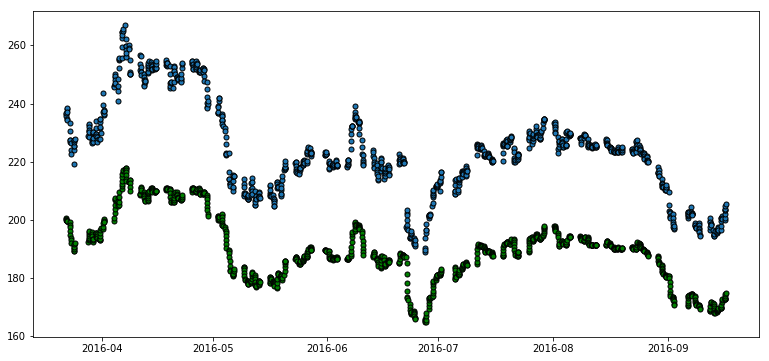

In [34]:
nn = 1000
plt.figure(figsize=(13, 6))
plt.plot(dataframe['Time'][-nn:], y_test_inv[-nn:], 'o', ms=5,markeredgecolor='k')
plt.plot(dataframe['Time'][-nn:], y_test_predict_inv[-nn:], 'o', ms=5, color='green',markeredgecolor='k')